In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
print("Loading dataset...")
df = pd.read_csv("../data/data.csv")
print(f"Dataset loaded with shape: {df.shape}")
df.head()

Loading dataset...
Dataset loaded with shape: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
# Display the first basic info of the dataset
print("\n--- Basic Information ---")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n--- Data Types ---")
print(df.dtypes)


--- Basic Information ---
Number of rows: 6362620
Number of columns: 11

--- Data Types ---
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [12]:
print("\n--- Missing Values ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")


--- Missing Values ---
No missing values found


In [13]:
print("\n--- Basic Statistics ---")
print(df.describe().T)


--- Basic Statistics ---
                    count          mean           std  min       25%  \
step            6362620.0  2.433972e+02  1.423320e+02  1.0    156.00   
amount          6362620.0  1.798619e+05  6.038582e+05  0.0  13389.57   
oldbalanceOrg   6362620.0  8.338831e+05  2.888243e+06  0.0      0.00   
newbalanceOrig  6362620.0  8.551137e+05  2.924049e+06  0.0      0.00   
oldbalanceDest  6362620.0  1.100702e+06  3.399180e+06  0.0      0.00   
newbalanceDest  6362620.0  1.224996e+06  3.674129e+06  0.0      0.00   
isFraud         6362620.0  1.290820e-03  3.590480e-02  0.0      0.00   
isFlaggedFraud  6362620.0  2.514687e-06  1.585775e-03  0.0      0.00   

                       50%           75%           max  
step               239.000  3.350000e+02  7.430000e+02  
amount           74871.940  2.087215e+05  9.244552e+07  
oldbalanceOrg    14208.000  1.073152e+05  5.958504e+07  
newbalanceOrig       0.000  1.442584e+05  4.958504e+07  
oldbalanceDest  132705.665  9.430367e+05


--- Fraud Distribution ---
Legitimate transactions: 99.87%
Fraudulent transactions: 0.13%
Imbalance ratio: 1:773.70


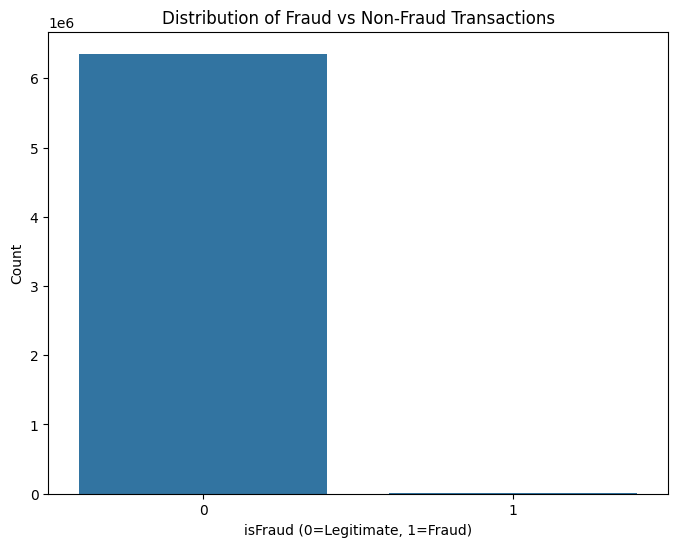

In [14]:
if 'isFraud' in df.columns:
    print("\n--- Fraud Distribution ---")
    fraud_counts = df['isFraud'].value_counts(normalize=True) * 100
    print(f"Legitimate transactions: {fraud_counts[0]:.2f}%")
    print(f"Fraudulent transactions: {fraud_counts[1]:.2f}%")
    print(f"Imbalance ratio: 1:{fraud_counts[0]/fraud_counts[1]:.2f}")
    
    plt.figure(figsize=(8, 6))
    sns.countplot(x='isFraud', data=df)
    plt.title('Distribution of Fraud vs Non-Fraud Transactions')
    plt.ylabel('Count')
    plt.xlabel('isFraud (0=Legitimate, 1=Fraud)')
    plt.show()


--- Transaction Type Distribution ---
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


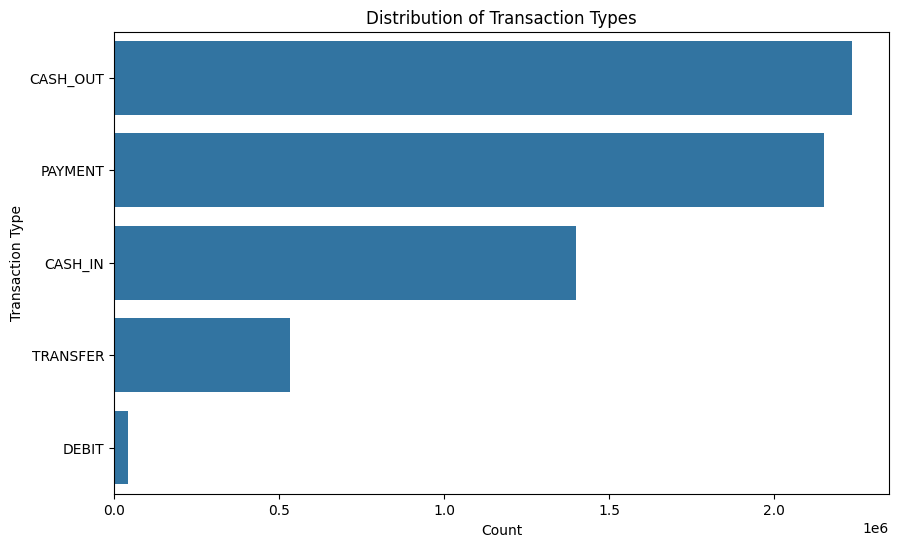


--- Fraud by Transaction Type ---
type
TRANSFER    0.768799
CASH_OUT    0.183955
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


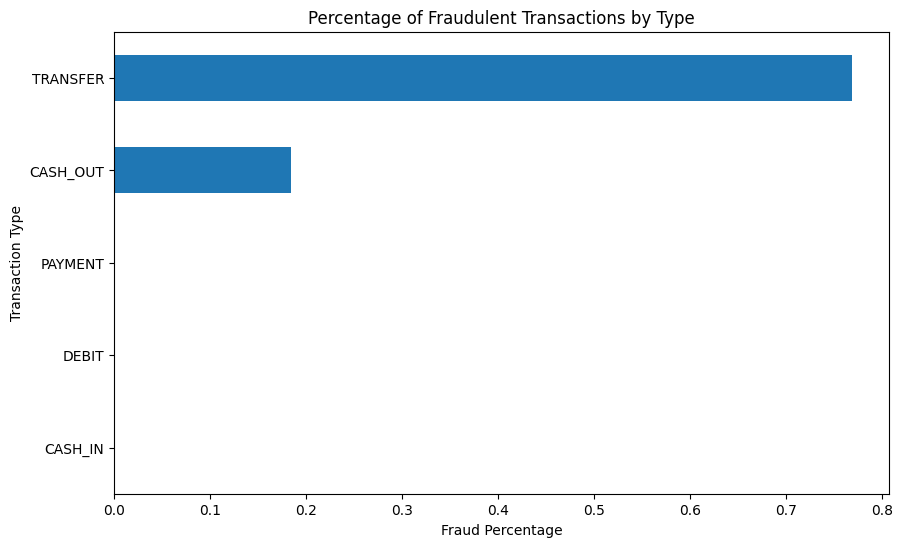

In [15]:

print("\n--- Transaction Type Distribution ---")
print(df['type'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(y='type', data=df, order=df['type'].value_counts().index)
plt.title('Distribution of Transaction Types')
plt.xlabel('Count')
plt.ylabel('Transaction Type')
plt.show()
    
# Fraud by transaction type

print("\n--- Fraud by Transaction Type ---")
fraud_by_type = df.groupby('type')['isFraud'].mean() * 100
print(fraud_by_type.sort_values(ascending=False))

# Plot fraud percentage by transaction type
plt.figure(figsize=(10, 6))
fraud_by_type.sort_values().plot(kind='barh')
plt.title('Percentage of Fraudulent Transactions by Type')
plt.xlabel('Fraud Percentage')
plt.ylabel('Transaction Type')
plt.show()


--- Amount Distribution ---
Min amount: 0.0
Max amount: 92445516.64
Mean amount: 179861.90
Median amount: 74871.94


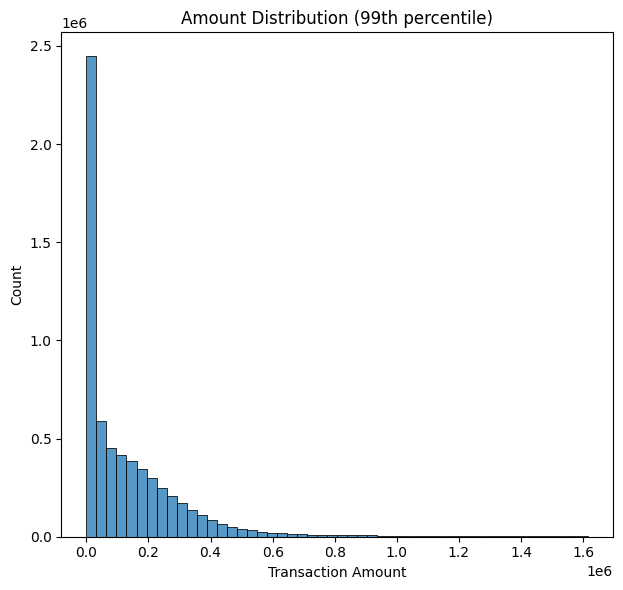

In [16]:
print("\n--- Amount Distribution ---")
print(f"Min amount: {df['amount'].min()}")
print(f"Max amount: {df['amount'].max()}")
print(f"Mean amount: {df['amount'].mean():.2f}")
print(f"Median amount: {df['amount'].median():.2f}")

# Plot amount distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['amount'][df['amount'] < df['amount'].quantile(0.99)], bins=50)
plt.title('Amount Distribution (99th percentile)')
plt.xlabel('Transaction Amount')
plt.tight_layout()
plt.show()

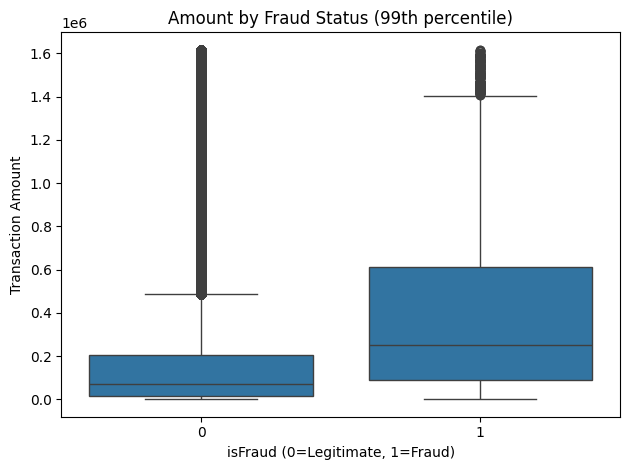

In [17]:

sns.boxplot(x='isFraud', y='amount', data=df[df['amount'] < df['amount'].quantile(0.99)])
plt.title('Amount by Fraud Status (99th percentile)')
plt.ylabel('Transaction Amount')
plt.xlabel('isFraud (0=Legitimate, 1=Fraud)')
plt.tight_layout()
plt.show()


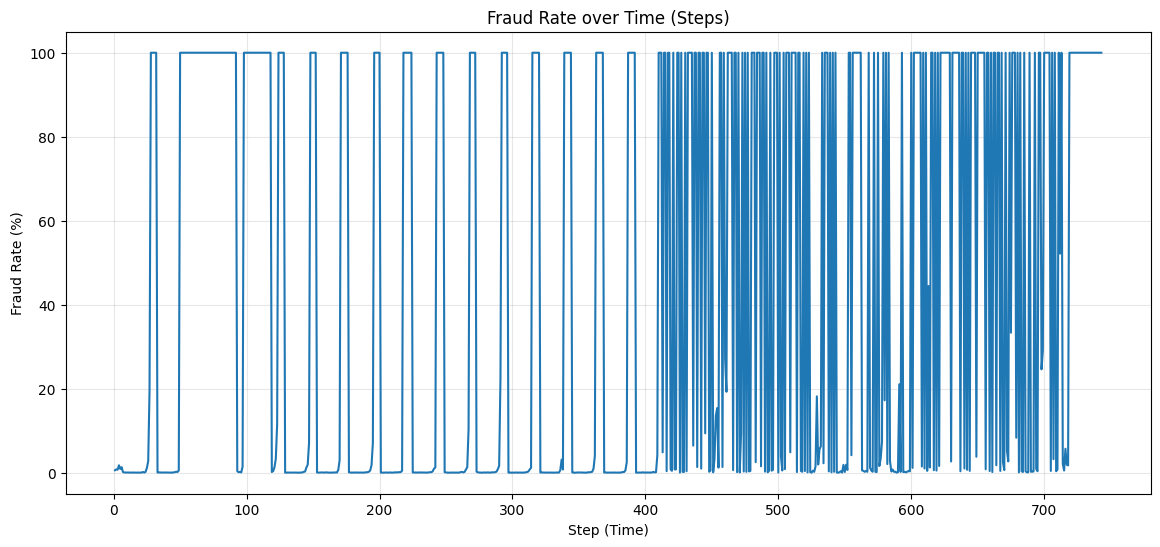

In [18]:
fraud_by_step = df.groupby('step')['isFraud'].mean().reset_index()
        
plt.figure(figsize=(14, 6))
plt.plot(fraud_by_step['step'], fraud_by_step['isFraud'] * 100)
plt.title('Fraud Rate over Time (Steps)')
plt.xlabel('Step (Time)')
plt.ylabel('Fraud Rate (%)')
plt.grid(True, alpha=0.3)
plt.show()


--- Correlation Analysis ---


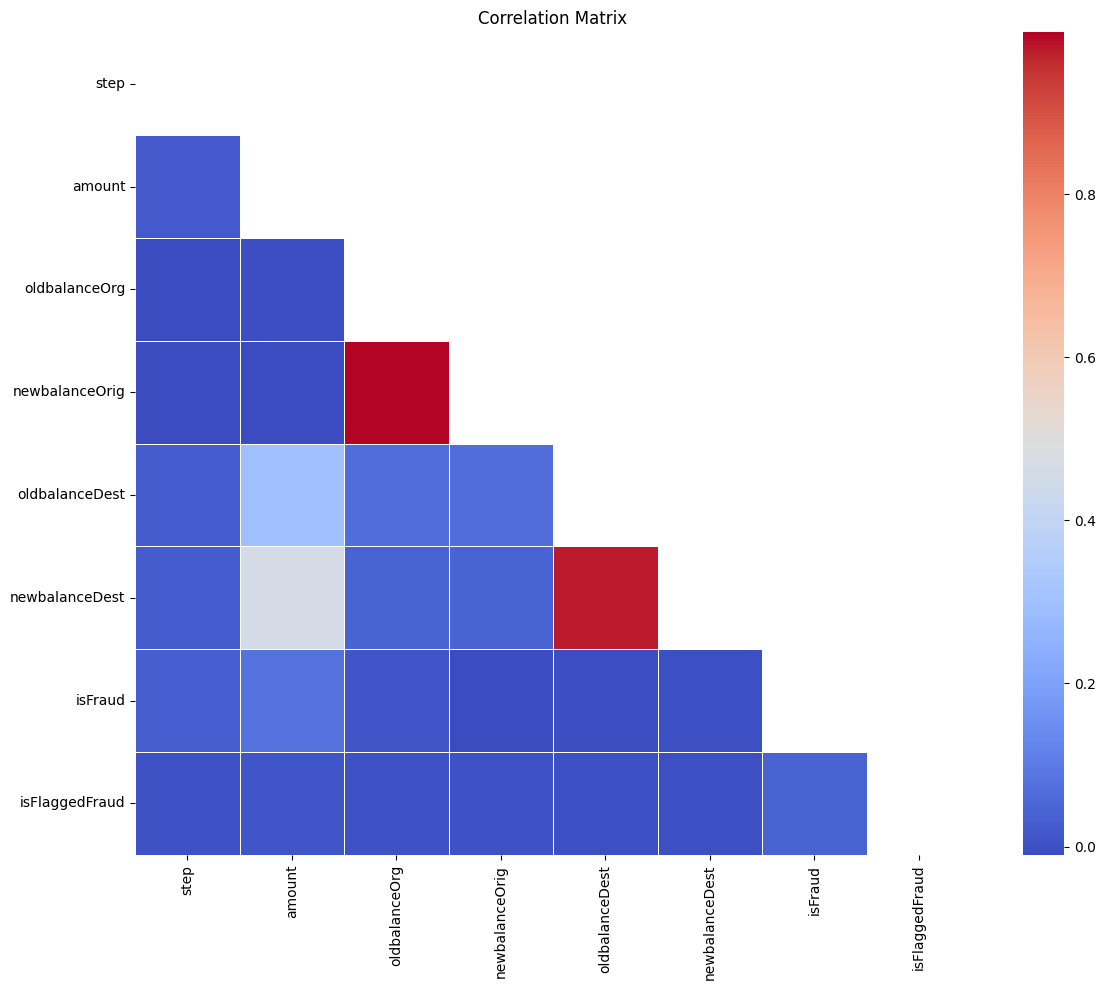

In [ ]:
print("\n--- Correlation Analysis ---")
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))

correlation = numeric_df.corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()